# Basic OLS Concepts

The following code covers the basic notions on OLS estimators via Python.

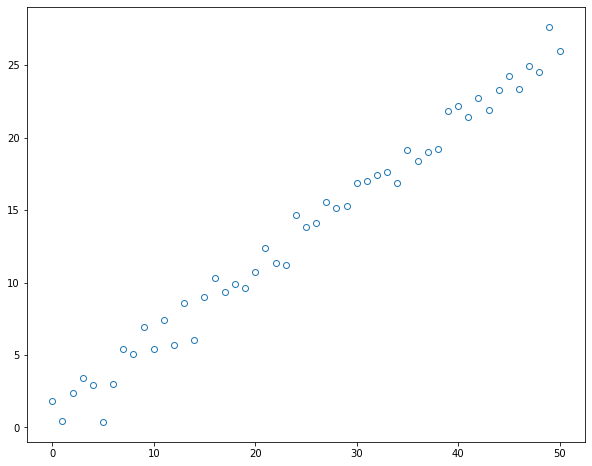

In [1]:
#Generating sample data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Assign any random seed for data generation
np.random.seed(234)
# Set the (real) coefficients:
N = 50
beta_0 = 1
beta_1 = 0.5
# Generate sample data:
x = np.arange(start = 0, stop = N + 1, step = 1) #creates a list of 50+1 elements, starting in zero, each of them distanced by 1
e = np.random.normal(loc = 0, scale = 1, size = len(x)) #real (and random) error terms, mean zero, std 1
y = beta_0 + beta_1 * x + e
# Plot the data
_ = plt.figure(num = 0, figsize = (10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'none')
plt.show()


Notice that the $\mathbf{y}$ vector of real observations is a dataset with length 51, generated with the classical simple regression model:

$$
\large{
    \mathbf{y = \beta_{0} + \beta_{1}x + \varepsilon}
}
$$

and it has the following values:

In [5]:
print("There are", len(y), "observations of y.")
y

There are 51 observations of y.


array([ 1.81879162,  0.45644936,  2.3509007 ,  3.42157829,  2.91261814,
        0.37111536,  3.03026733,  5.43466579,  5.04386634,  6.9252155 ,
        5.44293728,  7.42682445,  5.71644626,  8.59625686,  6.06752745,
        8.9789592 , 10.34458964,  9.32457934,  9.91729562,  9.61154527,
       10.69923351, 12.40837517, 11.35440869, 11.17638637, 14.67798561,
       13.79918144, 14.1094715 , 15.54408091, 15.1496757 , 15.24752492,
       16.84703683, 17.00577368, 17.39264502, 17.64184493, 16.85678263,
       19.13979663, 18.40863856, 19.03584964, 19.20214089, 21.81076281,
       22.17479389, 21.44953047, 22.71895176, 21.90363463, 23.25624696,
       24.27428894, 23.34143038, 24.92183733, 24.52903097, 27.6580121 ,
       25.98836327])

<br>

The next cell shows us the estimates of $\hat{\beta}_{1}$ and $\hat{\beta}_{0}$, following the known formulas (Hayashi 2000, p. 18; Goldberger 1991, p. 188; Wooldridge 2002, p. 53):

<br>

$$
\Large{
\begin{cases}
    \mathbf{
        \widehat{\beta}_{1} = 
        \frac
            {\sum \limits _{i=1} ^{N} (X_{i} - \bar{X})(y_{i} - \bar{y})}
            {\sum \limits _{i=1} ^{N} (X_{i} - \bar{X})^2} = 
        \frac
            {\widehat{\mathbb{C}ov}(X,y)}
            {\widehat{\mathbb{V}ar}(X)}\\
    \widehat{\beta}_{0} = \bar{y} - \hat{\beta}_{1}\overline{X}
    }
\end{cases}
}
$$

where $\widehat{\beta}_{1}$ is the OLS estimator for the parameter $\beta_{1}$, and $\widehat{\beta}_{0}$ is obtained from manipulating the classical linear regression model in terms of mean ($\mathbf{\bar{y} = \widehat{\beta}_{0} + \widehat{\beta}_{1}\bar{X}}$), i.e., without the error term, which has expectance equal to zero by assumption 2 (strict exogeneity, $\mathbf{\mathbb{E}[\varepsilon | X] = 0}$).

In [8]:
beta_1_est = np.cov(x, y, bias = True)[0][1] / np.var(x, ddof=1) #bias=True sets normalization by N, which is actually (N-1), since we have 50+1 observations. By default (False) by (N-1) (sample covar, unbiased).
beta_0_est = np.mean(y) - beta_1_est * np.mean(x)
print("Estimated beta_0 = " + str(beta_0_est) + ". True beta_0 = " + str(beta_0))
print("Estimated beta_1 = " + str(beta_1_est) + ". True beta_1 = " + str(beta_1))

Estimated beta_0 = 1.0884980699424691. True beta_0 = 1
Estimated beta_1 = 0.4999237210652572. True beta_1 = 0.5


By default, np.cov(x,y) returns a matrix of var-cov between the arguments (x,y) like

$$
\large{
    \begin{bmatrix}
        \mathbf{\mathbb{C}ov(x,x)} & \mathbf{\mathbb{C}ov(x,y)}\\
        \mathbf{\mathbb{C}ov(y,x)} & \mathbf{\mathbb{C}ov(y,y)}
    \end{bmatrix}
}
$$

That's why we're just selecting the element \[0\]\[1\], (it could also be \[1\]\[0\]), that gives the covariance between x and y, $\mathbb{C}ov(x,y)$. (See #https://numpy.org/doc/stable/reference/generated/numpy.cov.html, #https://numpy.org/doc/stable/reference/generated/numpy.var.html.)

Further, notice that the given formula of $\hat{\beta_{1}}$ considers the **sample** covariance and the **sample** variance. It's important to have in mind the lengths of your datasets because of the way np.cov() and np.var() works.<br>
By default, np.cov() sets its parameter bias = False. This means that the functions considers N-1, where N is the length of the parameters.<br>
On the other hand, np.var() sets its parameter ddof=0 by default. Actually, the function always does the division as (N - ddof), but if nothing is informed, it taks ddof=0.

In our case, with bias = False (default) in np.cov(), and np.var(ddof=0) (default), the estimate of $\hat{\beta_{1}}$ is biased in two ways:
1. it neither considers the sample convariance, since it is considering the length of the parameters (51 in this case);
2. nor considers the sample variance, since it is considering the length of parameter x (51 in this case).

This generates a $\hat{\beta_{1}}$ of:

In [14]:
beta_b_1 = np.cov(x, y)[0][1] / np.var(x) 
print(str(np.cov(x, y)[0][1] / np.var(x)))

0.5201206393962936


With bias = False (default) in np.cov(), and np.var(ddof=1) (unbiased), the estimate of $\hat{\beta_{1}}$ is biased only because of covariace. This generates a $\hat{\beta_{1}}$ of:

In [15]:
beta_b_2 = np.cov(x, y)[0][1] / np.var(x, ddof = 1)
print(str(np.cov(x, y)[0][1] / np.var(x, ddof = 1)))

0.5099221954865624


With bias = True (unbiased) in np.cov(), and np.var(ddof=0) (default), the estimate of $\hat{\beta_{1}}$ is biased only because of variance. This generates a $\hat{\beta_{1}}$ of:

In [16]:
beta_b_3 = np.cov(x, y, bias = True)[0][1] / np.var(x) 
print(str(np.cov(x, y, bias = True)[0][1] / np.var(x)))

0.5099221954865624


Finally, with bias = True (unbiased) in np.cov(), and np.var(ddof=1) (unbiased), the estimate of $\hat{\beta_{1}}$ is $\textbf{unbiased}$:

In [33]:
print(beta_1_est)

0.4999237210652572


And we can check that this is actually the best estimate for the real $\beta_{1}$:

In [34]:
print("Diff between first biased estimate and real beta_1: \n\t" +
         str(abs(beta_1 - beta_b_1)))
print("\n Diff between second biased estimate and real beta_1: \n\t" +
         str(abs(beta_1 - beta_b_2)))
print("\n Diff between third biased estimate and real beta_1: \n\t" +
         str(abs(beta_1 - beta_b_3)))
print("\n Diff between unbiased estimate and real beta_1: \n\t" +
         str('{0:.20f}'.format(abs(beta_1 - beta_1_est))))

Diff between first biased estimate and real beta_1: 
	0.020120639396293605

 Diff between second biased estimate and real beta_1: 
	0.009922195486562368

 Diff between third biased estimate and real beta_1: 
	0.009922195486562368

 Diff between unbiased estimate and real beta_1: 
	0.00007627893474282388


# OLS Matrix Method

The OLS estimator for $\hat{\beta}$ is the following (Hayashi 2000, p. 18; Goldberger 1991, p. 183; Wooldridge 2002, p. 53):

$$
\large{
\mathbf{\widehat{\beta} = (X'X)^{-1}X'y}
}
$$

where $\mathbf{X}$ is the N $\times$ K data matrix of regressors with $\textit{i}$-th row $\mathbf{x_{i}}$, and $\mathbf{y}$ is the N $\times$ 1 is the data vector with $\textit{i}$-th element $\mathbf{y_{i}}$.

For the univariate case, we have that 

$$
\large{
    \hat{\beta} = 
        \begin{bmatrix}
            \hat{\beta}_{0}\\
            \hat{\beta}_{1}
        \end{bmatrix} = 
        \begin{bmatrix}
                \mathbf{
                \frac
                    {\bar{X}^{2}\cdot\overline{y} - \overline{X} \cdot \overline{Xy}}
                    {\widehat{Var}(X)}\\
                \phantom{|.}
                \frac
                    {\widehat{Cov}(X,y)}
                    {\widehat{Var}(X)}
                }
        \end{bmatrix}
}
$$

In [15]:
#this first line sets a matrix (N+1) x 2, where the first column is composed by (N+1) numbers 1, and the second has all values in vector x
x_mat = np.column_stack((np.ones(len(x)), x))

#this line calculates beta using the formula (X'X)^-1 * X'y. The np.dot() function is the vectorial product function
beta_mat = np.dot(np.linalg.inv(np.dot(np.transpose(x_mat), x_mat)), #this is (X'X)^-1
                  np.dot(np.transpose(x_mat), y)) #this is X'y

#note that X is (N+1)x2. Thus, X'X is a 2x2 matrix. Also, X' is 2x(N+1), while y is (N+1)x1, resulting in a 2x1 matrix
#using the funcion np.shape(), we see that this is a (2,) vector. When the element after comma is ommited, is 1 by default
print(beta_mat)

#check if with print(y.shape), which we now is a column vector of N+1 lines

[0.83853621 0.5099222 ]


Now, we will use built-in functions of python to do the same job

In [26]:
import statsmodels.api as sm
#
x_mat = sm.add_constant(x)  # Add a constant column - not optional!
lm_model = sm.OLS(y, x_mat) # Creates the OLS regression object
lm_fit = lm_model.fit()     # Estimate the parameters
print(lm_fit.params)        # Extract the parameter estimates

[0.83853621 0.5099222 ]


# Relationship between estimates, residuals, fitted and actual values

The fitted values $\hat{\mathbf{y}}_{i}$ of the real $\mathbf{y}$ are defined by the OLS (or estimated) regression line as follows:

$$
\large{
\hat{\mathbf{y}}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1}\hat{\mathbf{X}}_{i}
}
$$

where $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$ are estimated via OLS. By definition, each fitted value of $\hat{\mathbf{y}}_{i}$ is on the estimated OLS regression line.

The residuals $\mathbf{e}_{i}$ are defined as the difference between the actual and the fitted values of $\mathbf{y}$ as follows:

$$
\large{
\mathbf{e}_{i} = \mathbf{y}_{i} - \hat{\mathbf{y}}_{i} = \mathbf{y}_{i} - \hat{\beta}_{0} - \hat{\beta}_{1}\hat{\mathbf{X}}_{i}
}
$$

which are hopefully close to the error terms $\varepsilon_{i}$ of the real model.

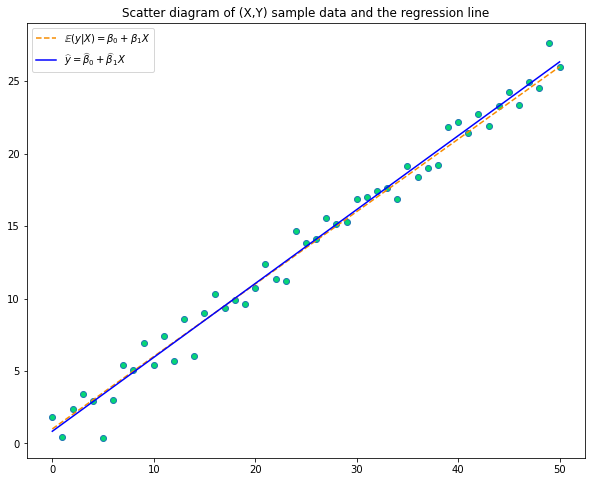

In [114]:
# The unknown model, which we do observe y:
y_obs = beta_0 + beta_1 * x
# The fitted values:
y_fit = beta_mat[0] + beta_mat[1] * x
# Plot the sample data
_ = plt.figure(num = 0, figsize = (10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = '#06d775')
_ = plt.title("Scatter diagram of (X,Y) sample data and the regression line")
# Plot the Unknown Population regression:
_ = plt.plot(x, y_obs, linestyle = "--", color = "#F78C00", 
              label='$\mathbb{E}(y|X) = \\beta_0 + \\beta_1 X$')
# Plot the fitted regression line:
_ = plt.plot(x, y_fit, linestyle = "-", color = "blue",
              label='$\widehat{y} = \widehat{\\beta}_0 + \widehat{\\beta}_1 X$')
_ = plt.legend()
plt.show()

Taking a closer look to our regression model, we have the following result.

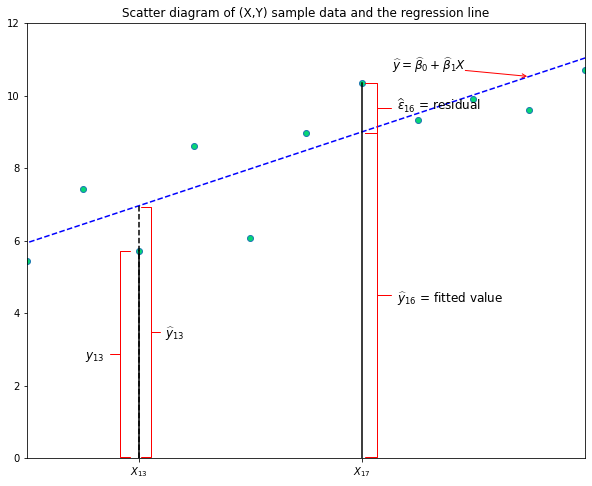

In [127]:
_ = plt.figure(num = 1, figsize=(10, 8)) #image size
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = '#06d775') #sample data dots in black

#Limiting the range of shown data
_ = plt.ylim(ymin = 0, ymax = 12)
_ = plt.xlim(xmin = 10, xmax = 20)

_ = plt.title("Scatter diagram of (X,Y) sample data and the regression line")
_ = plt.plot(x, y_fit, linestyle = "--", color = "blue")
# Add Axis labels and ticks at specific positions:
_ = plt.xticks([x[12], x[16]], ["$X_{13}$", "$X_{17}$"])
# Add vertical lines:
_ = plt.plot([x[12], x[12]], [0, y_obs[12]], '--', color = "black")
_ = plt.plot([x[12], x[12]], [0, y[12]], '-', color = "black")
_ = plt.plot([x[16], x[16]], [0, y[16]], '-', color = "black")
# Add some brackets:
_ = plt.annotate("", xy = (x[12]*0.955, y[12] / 2), 
             xytext = (x[12]*0.975, y[12] / 2),
             arrowprops = dict(arrowstyle = "]-, widthA=10.3,lengthA=1",
                               connectionstyle = "arc", color='red'))
_ = plt.annotate("", xy = (x[12]*1.015, y_fit[12] / 2),
             xytext = (x[12]*1.035, y_fit[12] / 2),
             arrowprops = dict(arrowstyle = "-[, widthB=12.5,lengthB=1",
                               connectionstyle = "arc", color='red'))
_ = plt.annotate("", xy = (x[16]*1.015, y_fit[16] / 2), 
             xytext = (x[16]*1.035, y_fit[16] / 2),
             arrowprops = dict(arrowstyle = "-[, widthB=16.2,lengthB=1.2",
                               connectionstyle = "arc", color='red'))
_ = plt.annotate("", xy = (x[16]*1.015, (y[16] + y_fit[16]) / 2),
             xytext = (x[16]*1.035, (y[16] + y_fit[16]) / 2),
             arrowprops = dict(arrowstyle = "-[, widthB=2.5,lengthB=1.2",
                               connectionstyle = "arc", color='red'))
# Add Actual, Fitted and Residual indicator text:
_ = plt.text(x[12]*0.92, y[12] / 2.1, r'$y_{13}$', fontsize = 12)
_ = plt.text(x[12]*1.04, y_fit[12] / 2.1, r'$\widehat{y}_{13}$', fontsize = 12)
_ = plt.text(x[16]*1.04, y_fit[16] / 2.1, 
  r'$\widehat{y}_{16}$ = fitted value', fontsize = 12)
_ = plt.text(x[16]*1.04, (y[16] + y_fit[16]) / 2.02, 
  r'$\widehat{\epsilon}_{16}$ = residual', fontsize = 12)
# Add Regression line
_ = plt.text(x[17] - 0.45, y[20], 
  r'$\widehat{y} = \widehat{\beta}_0 + \widehat{\beta}_1 X$', fontsize = 12)
_ = plt.annotate("", xy = (x[19], y_fit[19]), xytext = (x[18]*0.99, y[20]),
            arrowprops = dict(arrowstyle = "->", 
                              connectionstyle = "arc", color='red'))

plt.show()

# Properties of the OLS estimator

1. The sum (and the sample average) of the OLS residuals is zero:
$$
\large{
\sum \limits _{i=1} ^{N} \mathbf{e}_{i} = \sum \limits _{i=1} ^{N} \hat{\varepsilon}_{i} = 0
}
$$
where we use $\mathbf{e}_{i}$ more often to reference the OLS(estimation) residual. This follows from assumption 2 (strict exogeneity).
<br>
Of course, it's not actually zero, but is close enough (as close as we want/need to) to zero.

In [128]:
resid = y - y_fit
print("Sum of the residuals: " + str(sum(resid)))
#recall: 2.2160051571518125e-13 = 2.2160051571518125 * 10^-13 = 0.00000000000022160051571518125 (thirteen zeros)

Sum of the residuals: 2.2160051571518125e-13


2. The sample covariance between the regressors and the OLS residuals is zero:
$$
\large{
    \sum \limits _{i=1} ^{N} \mathbf{X}_{i}\mathbf{e}_{i} = 0
}
$$
which follows from the normal equations.
<br><br>
$\textit{Proof}$.\
By the normal equations, we have that $\mathbf{X'Xb = X'y}$. Defining $\mathbf{e = y - Xb}$, we have that\
$\mathbf{X'Xb = X'y <=> 0 = X'y - X'Xb <=> 0 = X'(y-Xb) <=> 0 = X'e}$. Rewriting this equation yields in
<br><br>
$$
\large{
    \mathbf{0 = 
        \begin{bmatrix}
            x_{1} & x_{2} & \dots & x_{n}
        \end{bmatrix}
        \times
        \begin{bmatrix}
            e_{1}\\
            e_{2}\\
            \vdots\\
            e_{n}
        \end{bmatrix}
        = x_{1}e_{1} + x_{2}e_{2} + \dots + x_{n}e_{n} = \sum \limits _{i=1} ^{N} \mathbf{X}_{i}\mathbf{e}_{i}
    }
}
.
$$


In [131]:
print("Sum of X*resid: " + str(sum(np.array(resid) * np.array(x))))

Sum of X*resid: 9.563905223330949e-12


In [132]:
print("Sample covariance of X and residuals: " + str(np.cov(resid, x)[0][1]))

Sample covariance of X and residuals: 8.054223954445661e-14


3. The point $(\mathbf{\overline{X},\overline{y}})$ is always on the regression line. This means that, on average, the model is always right, i.e., the following equation always holds:
<br><br>
$$
\large{
    \widehat{\beta}_{0} + \widehat{\beta}_{1}\overline{\mathbf{X}} = \mathbf{\overline{y}}.
}
$$

In [133]:
print("Predicted value with mean(X): " + str(beta_mat[0] + beta_mat[1] * np.mean(x)))

Predicted value with mean(X): 13.586591096573896


In [134]:
print("Sample mean of Y: " + str(np.mean(y)))

Sample mean of Y: 13.5865910965739
